In [ ]:
from datasets import load_dataset

ds = load_dataset("iamshnoo/dallestreet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(ds)

DatasetDict({
    car: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 1012
    })
    cups_mugs_glasses: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 970
    })
    family_snapshots: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 1018
    })
    front_door: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 1015
    })
    home: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 1001
    })
    kitchen: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 1021
    })
    plate_of_food: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 933
    })
    social_drink: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 1002
    })
    wall_decoration: Dataset({
        features: ['image', 'country', 'type'],
        num_rows: 978
    })
    wardrobe: Dataset({
        features: ['im

In [ ]:
first_car = ds['car'][0]

In [ ]:
print(f"Country: {first_car['country']}")
print(f"Type: {first_car['type']}")

Country: Austria
Type: vivid


In [ ]:
type(first_car['image'])

PIL.PngImagePlugin.PngImageFile

In [ ]:
# Install required Python packages (run in Colab cell; prefix with "!" in notebook)
!pip install --upgrade pip
!pip install torch torchvision --quiet
!pip install transformers accelerate datasets ftfy safetensors sentencepiece pillow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import argparse
import os
import json
from tqdm import tqdm
import pandas as pd
import torch
from PIL import Image

from datasets import load_dataset

from transformers import Blip2Processor, Blip2ForConditionalGeneration

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument("--concept", type=str, default="car", help="Dataset split key (e.g., 'car')")
parser.add_argument("--type", type=str, default="vivid", help="Image type filter (e.g., 'vivid' or 'generic')")
parser.add_argument("--model_name", type=str, default="Salesforce/blip2-flan-t5-xl",
                    help="BLIP-2 model to use. If OOM, use a smaller model here.")
parser.add_argument("--max_tokens", type=int, default=64, help="Max tokens for generation")
parser.add_argument("--batch_size", type=int, default=1, help="Batch size for generation (keep 1 if memory-limited)")
args = parser.parse_args([])


In [ ]:
CONCEPT = args.concept
TYPE = args.type
MODEL_NAME = args.model_name
MAX_TOKENS = args.max_tokens
BATCH_SIZE = args.batch_size

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cpu


In [ ]:
print("Loading dataset from Hugging Face (this will download if needed)...")
ds = load_dataset("iamshnoo/dallestreet")

Loading dataset from Hugging Face (this will download if needed)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/car-00000-of-00007.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

data/car-00001-of-00007.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

data/car-00002-of-00007.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

data/car-00003-of-00007.parquet:   0%|          | 0.00/368M [00:00<?, ?B/s]

data/car-00004-of-00007.parquet:   0%|          | 0.00/367M [00:00<?, ?B/s]

data/car-00005-of-00007.parquet:   0%|          | 0.00/370M [00:00<?, ?B/s]

data/car-00006-of-00007.parquet:   0%|          | 0.00/369M [00:00<?, ?B/s]

data/cups_mugs_glasses-00000-of-00007.pa(…):   0%|          | 0.00/408M [00:00<?, ?B/s]

data/cups_mugs_glasses-00001-of-00007.pa(…):   0%|          | 0.00/412M [00:00<?, ?B/s]

data/cups_mugs_glasses-00002-of-00007.pa(…):   0%|          | 0.00/399M [00:00<?, ?B/s]

data/cups_mugs_glasses-00003-of-00007.pa(…):   0%|          | 0.00/344M [00:00<?, ?B/s]

data/cups_mugs_glasses-00004-of-00007.pa(…):   0%|          | 0.00/347M [00:00<?, ?B/s]

data/cups_mugs_glasses-00005-of-00007.pa(…):   0%|          | 0.00/349M [00:00<?, ?B/s]

data/cups_mugs_glasses-00006-of-00007.pa(…):   0%|          | 0.00/339M [00:00<?, ?B/s]

data/family_snapshots-00000-of-00007.par(…):   0%|          | 0.00/438M [00:00<?, ?B/s]

data/family_snapshots-00001-of-00007.par(…):   0%|          | 0.00/442M [00:00<?, ?B/s]

data/family_snapshots-00002-of-00007.par(…):   0%|          | 0.00/441M [00:00<?, ?B/s]

data/family_snapshots-00003-of-00007.par(…):   0%|          | 0.00/390M [00:00<?, ?B/s]

data/family_snapshots-00004-of-00007.par(…):   0%|          | 0.00/387M [00:00<?, ?B/s]

data/family_snapshots-00005-of-00007.par(…):   0%|          | 0.00/392M [00:00<?, ?B/s]

data/family_snapshots-00006-of-00007.par(…):   0%|          | 0.00/386M [00:00<?, ?B/s]

data/front_door-00000-of-00007.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

data/front_door-00001-of-00007.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

data/front_door-00002-of-00007.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

data/front_door-00003-of-00007.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

data/front_door-00004-of-00007.parquet:   0%|          | 0.00/396M [00:00<?, ?B/s]

data/front_door-00005-of-00007.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

data/front_door-00006-of-00007.parquet:   0%|          | 0.00/394M [00:00<?, ?B/s]

data/home-00000-of-00007.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

data/home-00001-of-00007.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

data/home-00002-of-00007.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

data/home-00003-of-00007.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

data/home-00004-of-00007.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

data/home-00005-of-00007.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

data/home-00006-of-00007.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

data/kitchen-00000-of-00007.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

data/kitchen-00001-of-00007.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

data/kitchen-00002-of-00007.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

data/kitchen-00003-of-00007.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

data/kitchen-00004-of-00007.parquet:   0%|          | 0.00/396M [00:00<?, ?B/s]

data/kitchen-00005-of-00007.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

data/kitchen-00006-of-00007.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

data/plate_of_food-00000-of-00006.parque(…):   0%|          | 0.00/468M [00:00<?, ?B/s]

data/plate_of_food-00001-of-00006.parque(…):   0%|          | 0.00/470M [00:00<?, ?B/s]

data/plate_of_food-00002-of-00006.parque(…):   0%|          | 0.00/456M [00:00<?, ?B/s]

data/plate_of_food-00003-of-00006.parque(…):   0%|          | 0.00/404M [00:00<?, ?B/s]

data/plate_of_food-00004-of-00006.parque(…):   0%|          | 0.00/407M [00:00<?, ?B/s]

data/plate_of_food-00005-of-00006.parque(…):   0%|          | 0.00/403M [00:00<?, ?B/s]

data/social_drink-00000-of-00007.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

data/social_drink-00001-of-00007.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

data/social_drink-00002-of-00007.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

data/social_drink-00003-of-00007.parquet:   0%|          | 0.00/377M [00:00<?, ?B/s]

data/social_drink-00004-of-00007.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

data/social_drink-00005-of-00007.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

data/social_drink-00006-of-00007.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

data/wall_decoration-00000-of-00007.parq(…):   0%|          | 0.00/422M [00:00<?, ?B/s]

data/wall_decoration-00001-of-00007.parq(…):   0%|          | 0.00/431M [00:00<?, ?B/s]

data/wall_decoration-00002-of-00007.parq(…):   0%|          | 0.00/427M [00:00<?, ?B/s]

data/wall_decoration-00003-of-00007.parq(…):   0%|          | 0.00/394M [00:00<?, ?B/s]

data/wall_decoration-00004-of-00007.parq(…):   0%|          | 0.00/393M [00:00<?, ?B/s]

data/wall_decoration-00005-of-00007.parq(…):   0%|          | 0.00/405M [00:00<?, ?B/s]

data/wall_decoration-00006-of-00007.parq(…):   0%|          | 0.00/393M [00:00<?, ?B/s]

data/wardrobe-00000-of-00007.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

data/wardrobe-00001-of-00007.parquet:   0%|          | 0.00/415M [00:00<?, ?B/s]

data/wardrobe-00002-of-00007.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

data/wardrobe-00003-of-00007.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

data/wardrobe-00004-of-00007.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

data/wardrobe-00005-of-00007.parquet:   0%|          | 0.00/361M [00:00<?, ?B/s]

data/wardrobe-00006-of-00007.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

Generating car split:   0%|          | 0/1012 [00:00<?, ? examples/s]

Generating cups_mugs_glasses split:   0%|          | 0/970 [00:00<?, ? examples/s]

Generating family_snapshots split:   0%|          | 0/1018 [00:00<?, ? examples/s]

Generating front_door split:   0%|          | 0/1015 [00:00<?, ? examples/s]

Generating home split:   0%|          | 0/1001 [00:00<?, ? examples/s]

Generating kitchen split:   0%|          | 0/1021 [00:00<?, ? examples/s]

Generating plate_of_food split:   0%|          | 0/933 [00:00<?, ? examples/s]

Generating social_drink split:   0%|          | 0/1002 [00:00<?, ? examples/s]

Generating wall_decoration split:   0%|          | 0/978 [00:00<?, ? examples/s]

Generating wardrobe split:   0%|          | 0/985 [00:00<?, ? examples/s]

In [ ]:
if CONCEPT not in ds:
    raise ValueError(f"Concept '{CONCEPT}' not found in dataset. Available keys: {list(ds.keys())}")


In [ ]:
dataset = ds[CONCEPT]
print(f"Total rows for concept '{CONCEPT}':", len(dataset))

Total rows for concept 'car': 1012


In [ ]:
filtered_rows = [row for row in dataset if row["type"] == TYPE]
print(f"Filtered rows with type='{TYPE}':", len(filtered_rows))

Filtered rows with type='vivid': 438


In [ ]:
print("Loading BLIP-2 model:", MODEL_NAME)
# The processor encapsulates image transforms + tokenizer
processor = Blip2Processor.from_pretrained(MODEL_NAME)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loading BLIP-2 model: Salesforce/blip2-flan-t5-xl


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [ ]:
load_kwargs = {}
if device == "cuda":
    # use float16 if GPU available
    load_kwargs["torch_dtype"] = torch.float16

In [ ]:
model = Blip2ForConditionalGeneration.from_pretrained(MODEL_NAME, **load_kwargs)
model.to(device)
model.eval()

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
  )
  (qf

In [ ]:
def prompt_for_objects(concept_hint: str = None):
    # Short, explicit prompt asking for objects as comma-separated list
    # We ask for "objects and concrete nouns" and ask for short output
    prompt = "List the objects, items, and notable objects in the image as a comma-separated list. Be specific and brief."
    if concept_hint:
        prompt += f" Focus on objects related to '{concept_hint}' if present."
    return prompt

In [ ]:
def split_tags(text):
    # Convert BLIP-2 text into a clean list of tags
    # Split on commas, semicolons, ' and ', ' & '
    if text is None:
        return []
    s = text.strip()
    # Replace common separators with comma
    for sep in [";", " and ", " & ", "/", "\n"]:
        s = s.replace(sep, ",")
    parts = [p.strip() for p in s.split(",") if p.strip()]
    # Normalize simple punctuation
    parts = [p.rstrip(".") for p in parts]
    return parts

In [ ]:
results = []
os.makedirs(f"results/dalle_objects/{TYPE}", exist_ok=True)
out_path = f"results/dalle_objects/{TYPE}/{CONCEPT}.csv"

prompt_template = prompt_for_objects(CONCEPT.replace("_", " "))

In [35]:
# -----------------------------
# DEBUG MODE: limit to 2 images
# -----------------------------
NUM_DEBUG_IMAGES = 2
debug_rows = filtered_rows[:NUM_DEBUG_IMAGES]

print(f"\n🔍 DEBUG MODE ENABLED: Processing only {len(debug_rows)} images\n")

# -----------------------------
# INFERENCE LOOP (DEBUG)
# -----------------------------
for idx, row in enumerate(tqdm(debug_rows)):
    image = row["image"]

    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)

    try:
        # Prepare BLIP-2 inputs
        prompt = prompt_template
        inputs = processor(
            images=image,
            text=prompt,
            return_tensors="pt"
        ).to(device)

        # Generate BLIP-2 output
        generated_ids = model.generate(
            **inputs,
            max_new_tokens=MAX_TOKENS,
            do_sample=False
        )

        out_text = processor.tokenizer.batch_decode(
            generated_ids,
            skip_special_tokens=True
        )[0].strip()

        # Parse tags
        tags = split_tags(out_text)

        # Split relevant vs other objects
        relevant_objects = []
        other_objects = []
        concept_words = CONCEPT.replace("_", " ").lower()

        for t in tags:
            if concept_words in t.lower() or CONCEPT.lower() in t.lower():
                relevant_objects.append(t)
            else:
                other_objects.append(t)

        # -----------------------------
        # DEBUG PRINTS
        # -----------------------------
        print("\n" + "=" * 60)
        print(f"🖼️ IMAGE INDEX: {idx}")
        print(f"🌍 COUNTRY: {row['country']}")
        print(f"🎯 CONCEPT: {CONCEPT}")
        print("\n🧠 RAW BLIP-2 OUTPUT:")
        print(out_text)

        print("\n🏷️ PARSED TAGS:")
        print(tags)

        print("\n✅ RELEVANT OBJECTS:")
        print(relevant_objects)

        print("\n➕ OTHER OBJECTS:")
        print(other_objects)
        print("=" * 60 + "\n")

        # Store result (same format as full run)
        response_json = {
            "relevant_objects": relevant_objects,
            "other_objects": other_objects,
            "raw_caption": out_text
        }

        results.append({
            "id": f"{CONCEPT}_{TYPE}_{idx}",
            "model": "blip2",
            "split": f"{TYPE}_{CONCEPT}",
            "response": json.dumps(response_json),
            "true_country": row["country"],
            "concept": CONCEPT,
            "type": TYPE
        })

    except Exception as e:
        print(f"\n❌ ERROR at image {idx}: {e}\n")

        results.append({
            "id": f"{CONCEPT}_{TYPE}_{idx}",
            "model": "blip2",
            "split": f"{TYPE}_{CONCEPT}",
            "response": json.dumps({"error": str(e)}),
            "true_country": row.get("country", None),
            "concept": CONCEPT,
            "type": TYPE
        })



🔍 DEBUG MODE ENABLED: Processing only 2 images



 50%|█████     | 1/2 [35:52<35:52, 2152.16s/it]


🖼️ IMAGE INDEX: 0
🌍 COUNTRY: Austria
🎯 CONCEPT: car

🧠 RAW BLIP-2 OUTPUT:
,cars ,people ,buses ,trams ,buses ,cars ,people ,people ,cars ,cars ,cars ,cars ,cars ,cars ,cars ,cars

🏷️ PARSED TAGS:
['cars', 'people', 'buses', 'trams', 'buses', 'cars', 'people', 'people', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars']

✅ RELEVANT OBJECTS:
['cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars']

➕ OTHER OBJECTS:
['people', 'buses', 'trams', 'buses', 'people', 'people']



100%|██████████| 2/2 [1:08:35<00:00, 2057.63s/it]


🖼️ IMAGE INDEX: 1
🌍 COUNTRY: Austria
🎯 CONCEPT: car

🧠 RAW BLIP-2 OUTPUT:
car, truck, street, mountains, buildings, streetcar, streetcar, car, truck, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar, streetcar

🏷️ PARSED TAGS:
['car', 'truck', 'street', 'mountains', 'buildings', 'streetcar', 'streetcar', 'car', 'truck', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar']

✅ RELEVANT OBJECTS:
['car', 'streetcar', 'streetcar', 'car', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar', 'streetcar']

➕ OTHER OBJECTS:
['truck', 'street', 'mountains', 'buildings', 'truck']



Country: Austria
Type: vivid


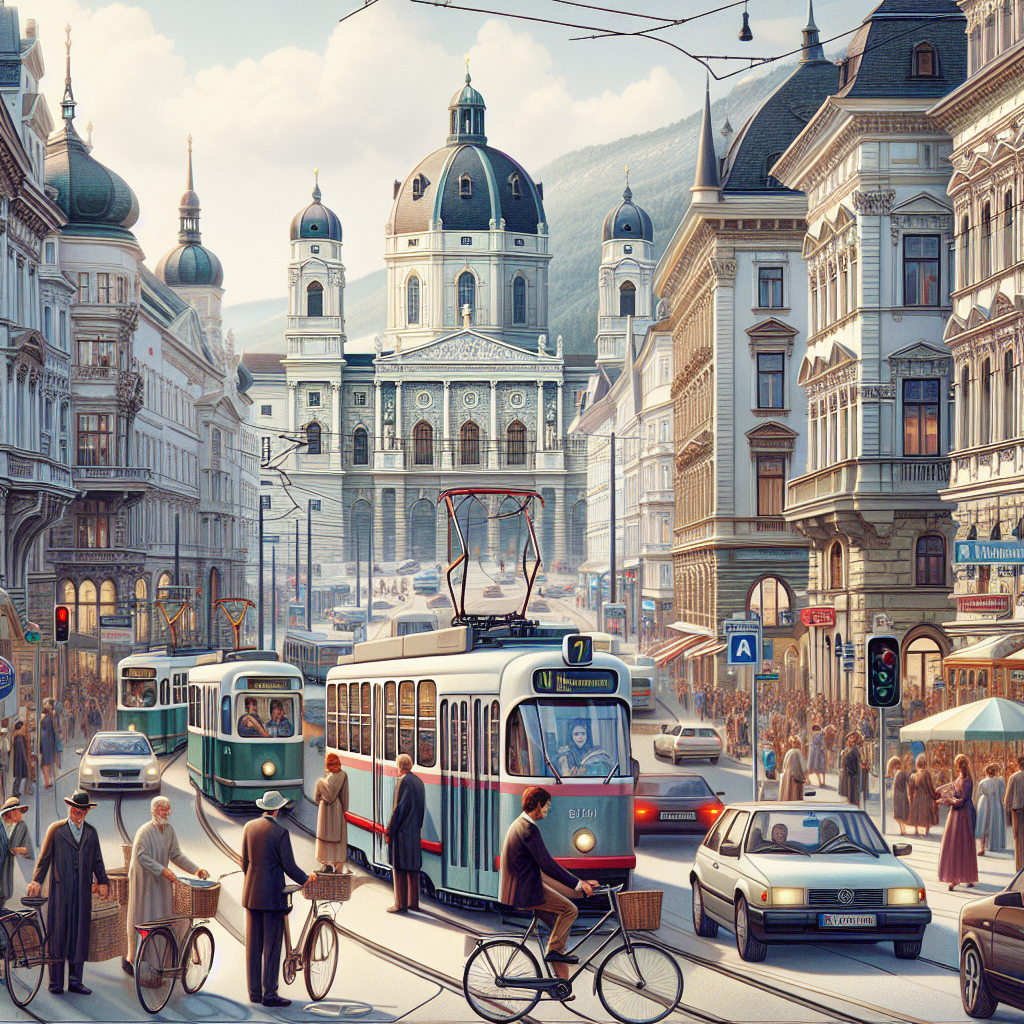

In [36]:
first_car = ds['car'][0]

# Display the data
print(f"Country: {first_car['country']}")
print(f"Type: {first_car['type']}")

# Display the image
first_car['image']

Country: Austria
Type: vivid


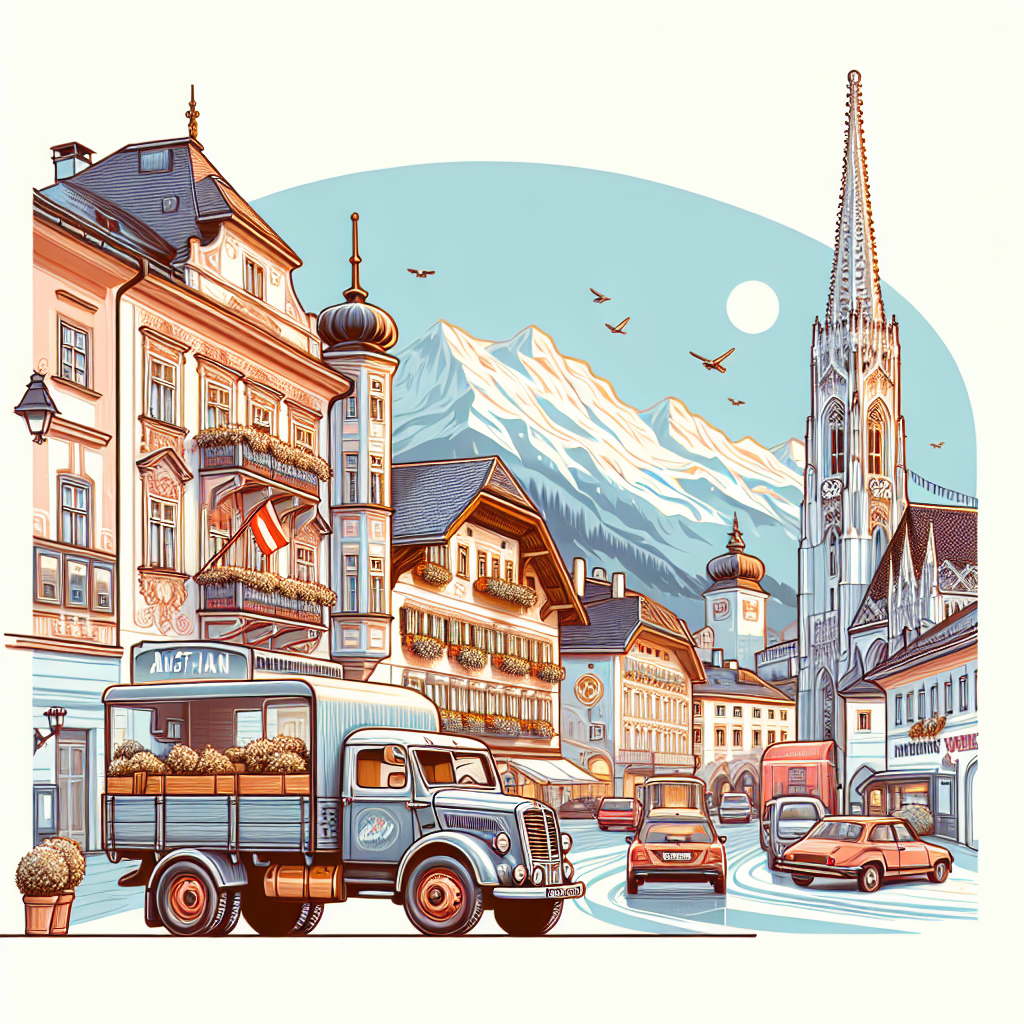

In [37]:
second_car = ds['car'][1]

# Display the data
print(f"Country: {second_car['country']}")
print(f"Type: {second_car['type']}")

# Display the image
second_car['image']